<a href="https://colab.research.google.com/github/papagorgio23/Python101/blob/master/Monte_Carlo_Simulation_(NBA_3_or_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo Simulation for Decision Analytics

## Simulate the final seconds of a basketball game to decide which strategy is needed to optimize your chance of winning the game

In [0]:
import time
from datetime import datetime
import random
import matplotlib.pyplot as plt

## Inputs

In [0]:
threePtPercent = 35  # Your % chance of making 3-pt shot
twoPtPercent = 45  # Your % chance of making a 2-pt shot
oppTwoPtPercent = 30  # Opponent % chance making 2-pt shot under tight situation
oppFtPercent = 80 # Opponent's FT %
timeToShoot2 = 5  # How many seconds elapse to shoot a 2
timeToFoul = 3  # How many seconds elapse to foul opponent
offenseReboundPercent = 25  # % of regular offense rebound
ftReboundPercent = 15  # % of offense rebound after missed FT
overtimePercent = 50  # % chance of winning in overtime

In [0]:
# random number generator
random.randrange(1, 101)

68

## Build functions

1.   Take a 3 function

2.   Take a 2 function

### 3 Pointer

Assumption: Run the best play possible to get an open 3. Time doesn't matter. You can use the entire shot clock or not but you are planning on only getting this one shot so you need to make it count. Since you are running a regular play your 3 point percentage should be the same as any other point in the game. 

**If you miss then you lose.**

If you make it you are tied and you have to play tight defense. They will have a much lower chance of making a shot than a typical game situation.

Then you go to overtime where you have a 50/50 chance to win the game.

In [0]:
# takeThree()
def takeThree():
    if random.randrange(1, 101) <= threePtPercent:
        if random.randrange(1, 101) <= oppTwoPtPercent:
            return False
        if random.randrange(1, 101) <= overtimePercent:
            return True
    return False

In [0]:
# test out the function
takeThree()

True

### Quick 2 and foul

In [0]:
# takeTwo()
def takeTwo():
    # start with the ball
    # initialize 'havePossession', 'timeLeft', and 'pointsDown'
    havePossession = True
    timeLeft = 30
    pointsDown = 3
    
    
    # simulate the end of the game
    # use a while loop
    while timeLeft > 0:
        # if you have the ball
        if havePossession == True:
      
            # handle the time left in the game if we have the ball
            # if we are down by 3 or more take a quick 2
            if pointsDown >= 3:
                # subtract timeToShoot2
                timeLeft -= timeToShoot2
            # or else hold for the last shot
            else:
                # time left should be 0 when we shoot
                timeLeft = 0
    
            # take a shot - Do we score?
            if random.randrange(1, 101) <= twoPtPercent:
                # if we make shot change pointsDown and change possession
                pointsDown -= 2
                havePossession = False
            # or else
            else:
                # if you miss the shot, does the other team get the rebound?
                if random.randrange(1, 101) > offenseReboundPercent:
                    # change possesion if we don't get the rebound
                    havePossession = False
                    
        # if you don't have possession
        else:
            # if we are down we need to foul
            if pointsDown > 0:
                # subtract time to foul from time left in the game
                timeLeft -= timeToFoul
            # first free throw
            if random.randrange(1, 101) <= oppFtPercent:
                # did he make it? change the score
                pointsDown += 1
            # second free throw
            if random.randrange(1, 101) <= oppFtPercent:
                # did he make it? change the score and change the possession
                pointsDown += 1
                havePossession = True
            # else if he misses it then do we get the rebound?
            elif random.randrange(1, 101) <= ftReboundPercent:
                # change possession
                havePossession = True
            
            # if we are tied or up we don't want to foul
            else:
                # they will run down the clock and take the final shot
                if random.randrange(1, 101) <= oppTwoPtPercent:
                    # if they make the shot change pointsDown
                    pointsDown += 2
                    
                # change timeLeft to 0
                timeLeft = 0
    # now we can return the results
    
    # if we are still down return False
    if pointsDown > 0:
        return False
        
    # else if we are up return True  
    elif pointsDown < 0:
        return True
        
    # else we are tied and we run overtime
    else:
        # if we win overtime return True
        if random.randrange(1, 101) <= overtimePercent:
            return True
            
        # else return False
        else:
            return False
            
        
        

In [0]:
takeTwo()

False

# Run the simulation 1,000,000 times

In [0]:
trials = 1000000
i = 1

# initiate counts
winsTakingThree = 0
lossTakingThree = 0
winsTakingTwo = 0
lossTakingTwo = 0

# let's time the simulation
start = datetime.now()

# while loop
while i <= trials:
        
    # run the three point simulation
    if takeThree():
        winsTakingThree += 1
    else:
        lossTakingThree += 1
        
    
        
    # run the two point simulation
    if takeTwo():
        winsTakingTwo += 1
    else:
        lossTakingTwo += 1
       
    
    # increase the count    
    i += 1
    

# Timer end
end = datetime.now()

print("It took {} to complete this simulation! Not too shabby!".format(end - start))

It took 0:00:19.871347 to complete this simulation! Not too shabby!


In [0]:
win3 = round(winsTakingThree/trials*100, 2)
win2 = round(winsTakingTwo/trials*100, 2)

print("You won {}% of the games when going for 3.\
      \nYou won {}% of the games when taking a quick 2 and fouling".format(win3, win2))

You won 12.25% of the games when going for 3.      
You won 3.34% of the games when taking a quick 2 and fouling


## Put results into a dictionary

In [0]:
# put results into a dictionary
results = {"winsTakingThree": winsTakingThree, "lossTakingThree": lossTakingThree, "winsTakingTwo":winsTakingTwo, "lossTakingTwo":lossTakingTwo}

In [0]:
# view results
results

{'lossTakingThree': 877466,
 'lossTakingTwo': 966578,
 'winsTakingThree': 122534,
 'winsTakingTwo': 33422}

## Plot results

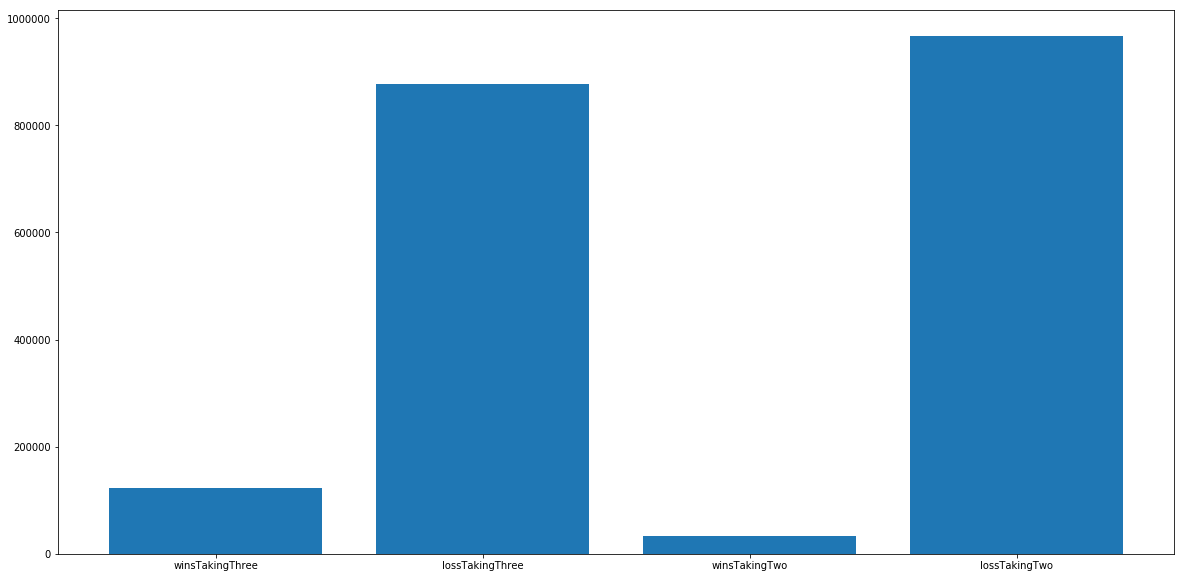

In [0]:
# change size
plt.figure(figsize=(20,10))

# create bars
plt.bar(range(len(results)), list(results.values()), align='center')

# Create names on the x-axis
plt.xticks(range(len(results)), list(results.keys()))

# plot the graph
plt.show()
